# Data Cleaning

In [1]:
import pandas as pd
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
data.tail()

,Hours,Scores
120,7.7,80
121,4.2,38
122,2.5,27
123,4.1,37
124,2.2,28


In [3]:
data.isna().any()

Hours     False
Scores    False
dtype: bool

In [4]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.isna().any().sum()

0

# Data selection Using Filter Method

In [6]:
import pandas as pd
data = pd.read_csv('student_scores.csv')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [7]:
df = pd.read_csv('student_scores.csv')

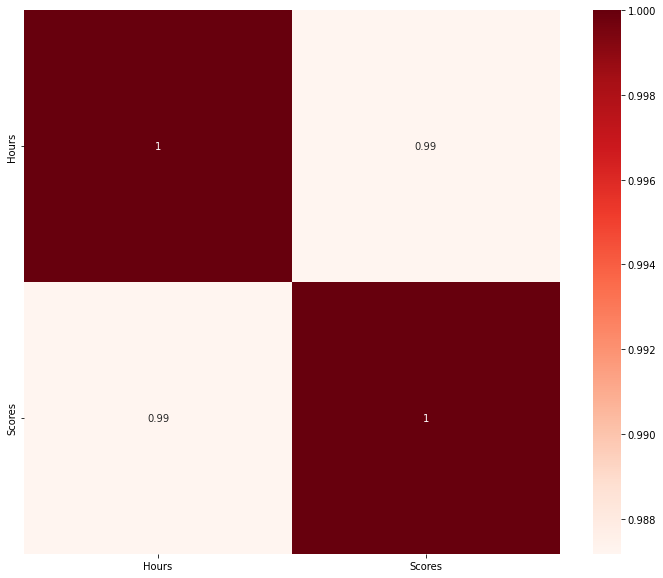

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
cor_target = abs(cor["Hours"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Hours     1.000000
Scores    0.987167
Name: Hours, dtype: float64

# Model Building with Data Split Using K-Fold

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
def generateModel(train, validation):
    train_x = np.array(train.iloc[:, :-1])
    train_y = train.iloc[:, -1]

    validation_x = np.array(validation.iloc[:, :-1])
    validation_y = validation.iloc[:, -1]

    # Making estimates from the validation set
    from sklearn.linear_model import LinearRegression
    clf = LinearRegression()
    clf.fit(train_x, train_y)
    pred_y = clf.predict(validation_x)

    error = np.square(np.subtract(validation_y, pred_y)).mean()
    return error

In [12]:
def K_Fold_Cross(df):
    k = 60
    min_key = 2

    # Preparing plot between value of 'K' and estimated error
    fig = plt.figure()
    plt.xlabel('No. of splits')
    plt.ylabel('Error')

    while (k <= len(df)):
        n_splits = k
        n = (len(df) // n_splits)
        total_error = 0

        for i in range(n_splits):
            # Preparing the train and validation data
            validation = df[(i * n):((i + 1) * n)]
            train = pd.concat([df[:(i * n)], df[((i + 1) * n):]])
            total_error += generateModel(train, validation)

        total_error = total_error / k

        if (k == 60):
            min_error = total_error
        else:
            if (total_error < min_error):
                min_error = total_error
                min_key = k

        fig = plt.scatter(k, total_error, color='g')
        k = k + 1

    return (fig, min_key, min_error)

In [13]:
data = pd.read_csv('student_scores.csv')

In [14]:
# Dividing the train and test data
train_data = data.iloc[:110, :]
test_data = data.iloc[110:, :]

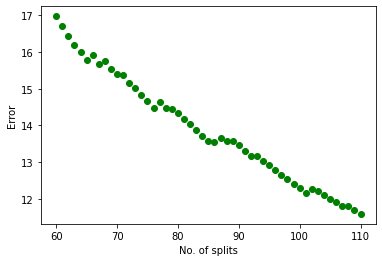

In [15]:
plot, correct_K, correct_error = K_Fold_Cross(train_data)

In [16]:
print("Estimated Error Rate =", correct_error, " with K =", correct_K)
plt.show()

Estimated Error Rate = 11.593478883945979  with K = 110


In [17]:
# Separating the predictors and labels for train and test data
train_x = np.array(train_data.iloc[:, :-1])
train_y = train_data.iloc[:, -1]
test_x = np.array(test_data.iloc[:, :-1])
test_y = test_data.iloc[:, -1]

# Model Evaluation

In [18]:
# Predicting actual error rate for Test Set
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

Text(0, 0.5, 'Predicted Y')

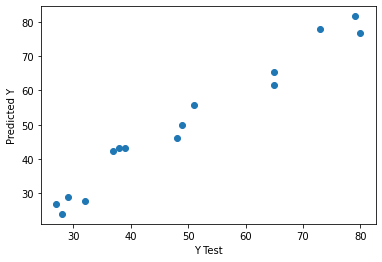

In [19]:
plt.scatter(test_y, pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [20]:
actual_error_rate = np.square(np.subtract(test_y, pred_y)).mean()
print("Actual Error Rate  = ", actual_error_rate)

Actual Error Rate  =  12.29605724379942


In [21]:
from sklearn import metrics
# evaluating the model

print('MAE :'," ", metrics.mean_absolute_error(test_y, pred_y))
print('MSE :'," ", metrics.mean_squared_error(test_y, pred_y))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

MAE :   2.997739024369188
MSE :   12.29605724379942
RMAE :   3.506573433396115


<AxesSubplot:xlabel='Scores', ylabel='Density'>

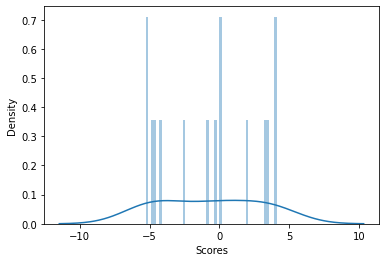

In [22]:
import seaborn as sns
# residuals Plot a histogram of the residuals and make sure it looks normally distributed use either seaborn distplot or plt.hist()
sns.distplot(test_y - pred_y,bins=50)